In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
housing_path = '/kaggle/input/california-housing-prices/housing.csv'


In [3]:
dataset = pd.read_csv(housing_path)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
## here lon , lat are of a scale and median income is of different scale
df1 = dataset[['longitude','latitude','median_house_value']]
df1

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0
...,...,...,...
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0


<Axes: xlabel='longitude', ylabel='latitude'>

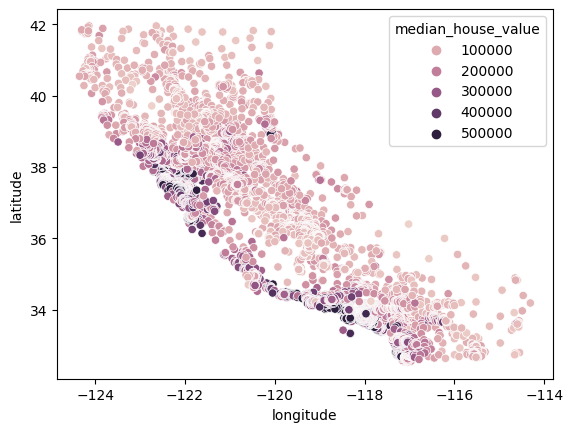

In [5]:
import seaborn as sns

sns.scatterplot(data = df1, x = 'longitude', y = 'latitude', hue = 'median_house_value')
## its clear that the houses near by the ocean is costlier than the ones further from ocean

# Normalizing the data
* "if we include price in the cluster, in addition to lat and lon , price would have an outsized weightage "
* " Thus it needs scaling on all the features "

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
scale = MinMaxScaler()


In [8]:
scaled = scale.fit_transform(df1)
scaled

array([[0.21115538, 0.5674814 , 0.90226638],
       [0.21215139, 0.565356  , 0.70824656],
       [0.21015936, 0.5642933 , 0.69505074],
       ...,
       [0.31175299, 0.73219979, 0.15938285],
       [0.30179283, 0.73219979, 0.14371281],
       [0.30976096, 0.72582359, 0.15340349]])

# Kmeans cluster
* Aims to minimize the within-cluster variance (variation of data points within a cluster ) by iteratively reassigning data points to the losest cluster centroids (centers)

In [9]:
""" 
HOW IT WORKS

1. Initialization: choose the number of clusters K , randomly assign data points to initial clusters
2. Centroid Calculation : calculate teh centroid (average) of each cluster
3. Reassignment: assign each data point to the cluster with the closet centroid 
    (based on distance metric like Euclidean distance)
4. Repeat: Recalculate centroids based on the newly assinged data points. 
    Repeat steps 3 and 4 until the cluster assignments no longer change (conergance)

LIMITATIONS : assumes spherical clusters and may not work well for complex,
            non-globular cluster shapes. sensitive to intializtion ( random assignment of initial clusters)

Use : when well separated, spherical (convex) clusters are naturally observed in the data; 
        use for numerical data if categorical data  is there then encode them numericallly and then apply k means

Dont Use : when non spherical (concave) clusters; unevenly sized clusters ; presence of outliers - it can 
            significantly impact kmeans becuase it minimize the distance to centroids. consider outlier removal
            or robust clustering alogs like ROCK ;
            High dimensoinality data is present then dont use kmeans - it is less effective in high dimensional data
            
            
Steps before training:
1. Data cleaning - missing values, outliers, inconsitences
2. Normalization or standardization - this ensures no single feature dominates the distance calcuations in kmeans
3. Handling Categoircal - encode them numerically first
"""


model = KMeans(n_clusters=3,random_state=143)
model.fit(scaled)
clusters = model.labels_
clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, ..., 1, 1, 1], dtype=int32)

In [10]:
df2 = df1.copy()
df2['clusters'] = clusters
df2

,longitude,latitude,median_house_value,clusters
0,-122.23,37.88,452600.0,2
1,-122.22,37.86,358500.0,1
2,-122.24,37.85,352100.0,1
3,-122.25,37.85,341300.0,1
4,-122.25,37.85,342200.0,1
...,...,...,...,...
20635,-121.09,39.48,78100.0,1
20636,-121.21,39.49,77100.0,1
20637,-121.22,39.43,92300.0,1
20638,-121.32,39.43,84700.0,1


<Axes: xlabel='longitude', ylabel='latitude'>

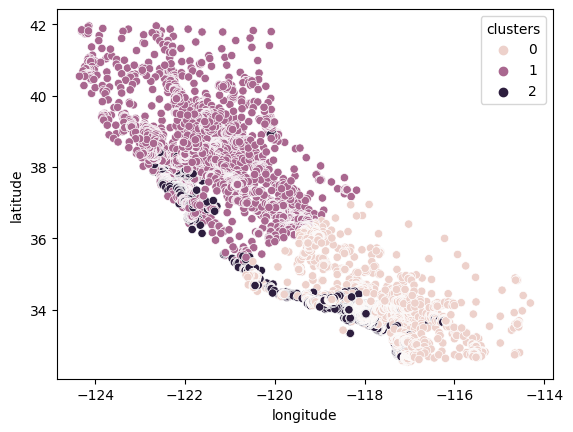

In [11]:

sns.scatterplot(data = df2, x = 'longitude', y = 'latitude', hue = 'clusters')


* How to choose a clustering model

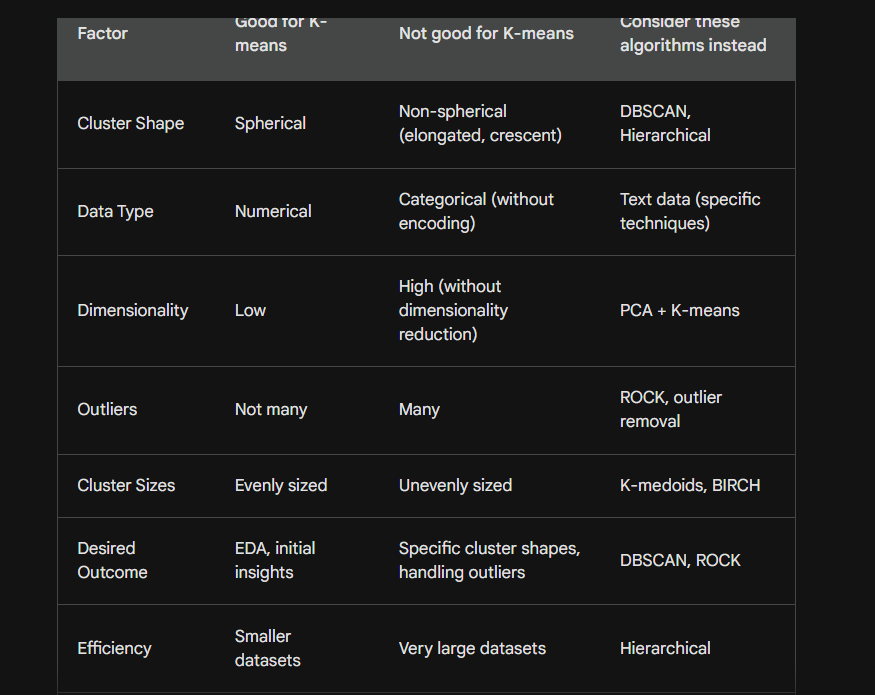

## when will Kmeans clustering will fail ?
* it performs best on the spehircal data, spherical data are data that group in space in close proximity to each other either.
* data that arent spherical or should not be sperical do not work well with k-means clustering. for example k-means clustering would not do well on the below data as we would not be able o find distinct centroids to cluster the two circles or acrs differently, despite them clearly visually being two distinct circles and arcs that should be labeled as such.

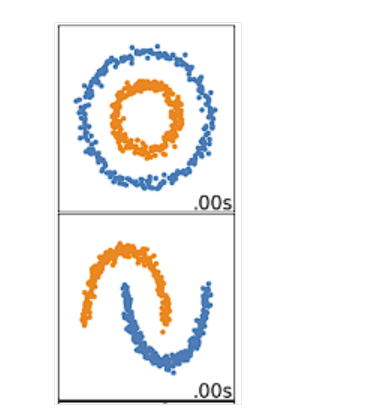]

## should you split your data
* it depeneds on what your goals are for clustering, if the goal is to cluster you data as the end of your analysis, then it is not necessary. if you are using the clusters as a feature in a supeerrvised learning model or for prediction, then you will need to split your data before clsutering to ensure you are following best practises for the supervised learning worflow.

# DBSCAN model
* In a bid to eliminate the problems of K means clustering with nested data and high dimensional data,use DBSCAN
* It has two hyper-parameters : epsilon-radius & minPts - no.of data points need to be present within radius

In [12]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, AffinityPropagation

In [13]:
scaled

array([[0.21115538, 0.5674814 , 0.90226638],
       [0.21215139, 0.565356  , 0.70824656],
       [0.21015936, 0.5642933 , 0.69505074],
       ...,
       [0.31175299, 0.73219979, 0.15938285],
       [0.30179283, 0.73219979, 0.14371281],
       [0.30976096, 0.72582359, 0.15340349]])

In [14]:
"""
DBSCAN CREATING CLUSTERS IN BELOW WAY:

1. Select a random point and consider it as a center point from the data

2. Check the other data points that present in the area of this center point 
    with the Epsilon value as its radius
    
3. IF this area has minPts no. of data points in it, then the center point 
    is considered  as a core point
    
4. the data points in this area are then considered as core point that further 
    extends by the same rules creating a cluster
    
5. If any of the point does not satisfy the rules, it is considered as non-core point that remains the part of 
    the cluster but it cannot extend the cluster further
    
6. when all the core points are done withe engulfing the other data points, non ocre poiints are included 
    and the cluster is completed
    
7. The next cluster then starts forming by the same rules.  some of the points dont be a part of any 
    of the clusters, such points are known as outliers/noise



"""


model = DBSCAN(eps=3, min_samples=5).fit(scaled)
# model.fit_predict(scaled)#.reshape(-1,1))


<Axes: xlabel='longitude', ylabel='latitude'>

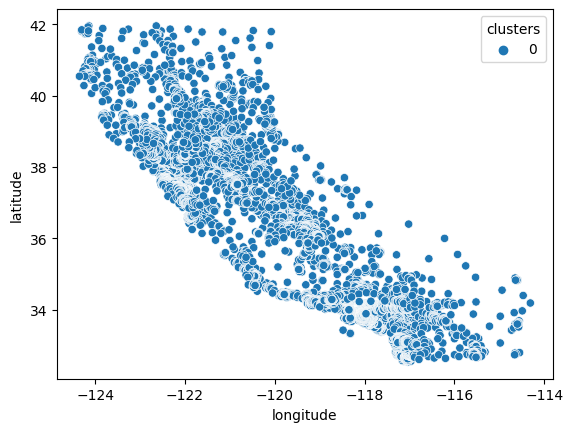

In [15]:
clusters = model.labels_
clusters
df2 = df1.copy()
df2['clusters'] = clusters
df2


sns.scatterplot(data = df2, x = 'longitude', y = 'latitude', hue = 'clusters')


## Kmeans vs DBSCAN


In [16]:
""" 
For a new data point, the kmeans calculates the distances between the point and the centroids(that are already calcualted)
after the calculation, the model will assign it to the closest distance cluster

In DBSCAN, doesnt have pre-defined centroids. It identifies clusters based on density, meanings data points
within a defined neighborhood and witha a minimum number of neighbors are considered part of a cluster.
Because DBSCAN doesnt rely on pre-calculated centroids, its not straight forward to directly assign a new data point to a
specific cluster.  Theres no singl cluster to compare teh new point to.



The presence of predict in Kmeans reflects its centroid based approach,
while the absence in DBSCAN highlights its reliance on density based clutering


"""



' \nFor a new data point, the kmeans calculates the distances between the point and the centroids(that are already calcualted)\nafter the calculation, the model will assign it to the closest distance cluster\n\nIn DBSCAN, doesnt have pre-defined centroids. It identifies clusters based on density, meanings data points\nwithin a defined neighborhood and witha a minimum number of neighbors are considered part of a cluster.\nBecause DBSCAN doesnt rely on pre-calculated centroids, its not straight forward to directly assign a new data point to a\nspecific cluster.  Theres no singl cluster to compare teh new point to.\n\n\n\nThe presence of predict in Kmeans reflects its centroid based approach,\nwhile the absence in DBSCAN highlights its reliance on density based clutering\n\n\n'

In [17]:


"""
Here's a breakdown for simpler understanding:

KMeans:

Centroids: Like pre-chosen "popular friends" at the party.
Clustering: People who gather around these popular friends are considered part of the same group.
Predict (new person): Easy to see who the new person would hang out with based on who they're closest to (centroids).
DBSCAN:

No Centroids: There are no pre-defined "popular friends."
Density: Groups form based on how close people are standing together.
If you're surrounded by many friends (high density), you're likely part of a group.
No Direct Predict: Because there's no single "center" of a group, 
it's not as simple to directly say which group a new person would be in.
"""

'\nHere\'s a breakdown for simpler understanding:\n\nKMeans:\n\nCentroids: Like pre-chosen "popular friends" at the party.\nClustering: People who gather around these popular friends are considered part of the same group.\nPredict (new person): Easy to see who the new person would hang out with based on who they\'re closest to (centroids).\nDBSCAN:\n\nNo Centroids: There are no pre-defined "popular friends."\nDensity: Groups form based on how close people are standing together.\nIf you\'re surrounded by many friends (high density), you\'re likely part of a group.\nNo Direct Predict: Because there\'s no single "center" of a group, \nit\'s not as simple to directly say which group a new person would be in.\n'

# Evaluation Metrics
* If truth labels are avaialble then : Examples of such metrics are the homogeneity,  completeness, V-measure, Rand-Index, Adjusted Rand-Index and Adjusted Mutual Inforamtion

* If the ground truth labels are not available then 'Silhouette Coefficient'

In [18]:
""" 
Silhouette Coefficient is a metric used to evaluate the quality of clustering 
resutls in machine learning.

It considers both how well data points are grouped within their assigned clusters-cohesion and 
how well they are separated from points in other clusters-separation

"""

' \nSilhouette Coefficient is a metric used to evaluate the quality of clustering \nresutls in machine learning.\n\nIt considers both how well data points are grouped within their assigned clusters-cohesion and \nhow well they are separated from points in other clusters-separation\n\n'